In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
data_curah = np.load ("/content/gdrive/MyDrive/Colab Notebooks/data/dataCurahHujan_202101.npy")
df_curah = pd.DataFrame(data_curah, columns=["Curah Hujan"])
data_citra = np.load("/content/gdrive/MyDrive/Colab Notebooks/data/dataHistAllCitra_202101.npy")
df_citra = pd.DataFrame(data_citra)

#Ngabungin Dua dataset yang kepisah
data_Cuaca = pd.concat([df_citra,df_curah],axis=1)
data_Cuaca

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,Curah Hujan
0,17336.0,1582.0,1383.0,1444.0,1469.0,1676.0,2239.0,127.0,2331.0,2211.0,...,2.0,295.0,288.0,291.0,326.0,295.0,322.0,2.0,5255.0,0.0
1,20801.0,2260.0,2202.0,1597.0,1640.0,1757.0,1810.0,60.0,1745.0,1818.0,...,4.0,290.0,274.0,288.0,274.0,274.0,259.0,14.0,5809.0,0.0
2,18137.0,1757.0,1812.0,1940.0,1955.0,2044.0,1896.0,64.0,2005.0,2246.0,...,2.0,147.0,171.0,159.0,163.0,160.0,178.0,12.0,3476.0,0.0
3,21519.0,2408.0,2284.0,1877.0,1585.0,1554.0,1629.0,114.0,1840.0,1804.0,...,8.0,418.0,380.0,386.0,386.0,395.0,410.0,10.0,7633.0,0.0
4,4974.0,124.0,80.0,26.0,8.0,12.0,1.0,1.0,4.0,8.0,...,3.0,70.0,72.0,64.0,70.0,63.0,62.0,19.0,5798.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267574,25537.0,1991.0,1749.0,1967.0,1735.0,1618.0,1516.0,43.0,1526.0,1401.0,...,10.0,898.0,863.0,815.0,774.0,737.0,695.0,15.0,20385.0,0.0
267575,19586.0,1678.0,1582.0,1625.0,1630.0,1470.0,1570.0,58.0,1806.0,1623.0,...,4.0,472.0,439.0,427.0,413.0,381.0,387.0,23.0,9908.0,0.0
267576,3666.0,221.0,366.0,447.0,124.0,86.0,103.0,0.0,33.0,39.0,...,23.0,122.0,122.0,124.0,111.0,99.0,95.0,3.0,9488.0,0.0
267577,15217.0,1108.0,1128.0,1064.0,1219.0,1294.0,1228.0,43.0,1309.0,1470.0,...,17.0,573.0,558.0,502.0,511.0,469.0,464.0,38.0,12001.0,1.2


In [ ]:
#Ambil data curah hujan > 0
data_hujan_13R = data_Cuaca.loc[data_Cuaca["Curah Hujan"] > 0]
#Ambil data Hujan sebanyak 13000 data
data_hujan_13R = data_hujan_13R[:13000]
data_hujan_13R

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,Curah Hujan
745,10448.0,951.0,1033.0,909.0,964.0,1053.0,1096.0,29.0,1160.0,1158.0,...,26.0,264.0,282.0,265.0,263.0,227.0,204.0,40.0,4288.0,1.2
1174,9618.0,939.0,960.0,1012.0,844.0,927.0,1183.0,32.0,1088.0,1297.0,...,11.0,237.0,211.0,232.0,201.0,235.0,230.0,25.0,3736.0,1.2
1445,10145.0,922.0,1067.0,883.0,866.0,873.0,945.0,29.0,1093.0,1203.0,...,9.0,235.0,243.0,244.0,216.0,224.0,214.0,31.0,4147.0,1.2
2158,10345.0,1000.0,838.0,905.0,918.0,989.0,1102.0,22.0,1254.0,1171.0,...,14.0,218.0,252.0,237.0,223.0,232.0,235.0,28.0,3728.0,1.2
2481,9795.0,1050.0,927.0,916.0,930.0,1054.0,1040.0,19.0,1349.0,1137.0,...,29.0,220.0,245.0,219.0,219.0,217.0,217.0,42.0,3546.0,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265403,3886.0,311.0,178.0,299.0,148.0,146.0,44.0,0.0,41.0,69.0,...,30.0,130.0,121.0,109.0,117.0,101.0,85.0,30.0,9190.0,1.2
265406,16585.0,1384.0,1239.0,1323.0,1162.0,1263.0,1402.0,51.0,1519.0,1541.0,...,16.0,307.0,312.0,270.0,290.0,273.0,255.0,16.0,7490.0,1.2
265408,14368.0,1416.0,1493.0,1456.0,1340.0,1249.0,1327.0,76.0,1484.0,1651.0,...,10.0,257.0,268.0,206.0,226.0,237.0,190.0,25.0,6058.0,2.4
265419,17075.0,1413.0,1249.0,1247.0,1449.0,1638.0,1579.0,41.0,1542.0,1490.0,...,22.0,1125.0,1380.0,2012.0,2016.0,1385.0,1161.0,272.0,15573.0,3.6


In [ ]:
#Ambil data curah hujan = 0
data_tidakHujan_13R = data_Cuaca.loc[data_Cuaca["Curah Hujan"] == 0]
#Ambil data Tidak Hujan sebanyak 13 ribu data
data_tidakHujan_13R = data_tidakHujan_13R[:13000]
data_tidakHujan_13R

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,Curah Hujan
0,17336.0,1582.0,1383.0,1444.0,1469.0,1676.0,2239.0,127.0,2331.0,2211.0,...,2.0,295.0,288.0,291.0,326.0,295.0,322.0,2.0,5255.0,0.0
1,20801.0,2260.0,2202.0,1597.0,1640.0,1757.0,1810.0,60.0,1745.0,1818.0,...,4.0,290.0,274.0,288.0,274.0,274.0,259.0,14.0,5809.0,0.0
2,18137.0,1757.0,1812.0,1940.0,1955.0,2044.0,1896.0,64.0,2005.0,2246.0,...,2.0,147.0,171.0,159.0,163.0,160.0,178.0,12.0,3476.0,0.0
3,21519.0,2408.0,2284.0,1877.0,1585.0,1554.0,1629.0,114.0,1840.0,1804.0,...,8.0,418.0,380.0,386.0,386.0,395.0,410.0,10.0,7633.0,0.0
4,4974.0,124.0,80.0,26.0,8.0,12.0,1.0,1.0,4.0,8.0,...,3.0,70.0,72.0,64.0,70.0,63.0,62.0,19.0,5798.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14245,26347.0,1569.0,1628.0,1558.0,1437.0,1441.0,1402.0,83.0,1775.0,1807.0,...,7.0,325.0,339.0,352.0,361.0,356.0,342.0,31.0,8242.0,0.0
14247,9076.0,921.0,836.0,953.0,923.0,885.0,954.0,33.0,1047.0,1187.0,...,10.0,387.0,438.0,351.0,403.0,388.0,384.0,12.0,6977.0,0.0
14248,5106.0,37.0,19.0,23.0,7.0,7.0,4.0,0.0,7.0,4.0,...,13.0,77.0,69.0,74.0,68.0,63.0,44.0,27.0,7860.0,0.0
14249,4700.0,185.0,91.0,71.0,72.0,22.0,15.0,0.0,15.0,9.0,...,0.0,88.0,100.0,93.0,71.0,69.0,68.0,0.0,9330.0,0.0


In [ ]:
data_hasil = pd.concat([data_hujan_13R,data_tidakHujan_13R],axis=0)
data_hasil

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,Curah Hujan
745,10448.0,951.0,1033.0,909.0,964.0,1053.0,1096.0,29.0,1160.0,1158.0,...,26.0,264.0,282.0,265.0,263.0,227.0,204.0,40.0,4288.0,1.2
1174,9618.0,939.0,960.0,1012.0,844.0,927.0,1183.0,32.0,1088.0,1297.0,...,11.0,237.0,211.0,232.0,201.0,235.0,230.0,25.0,3736.0,1.2
1445,10145.0,922.0,1067.0,883.0,866.0,873.0,945.0,29.0,1093.0,1203.0,...,9.0,235.0,243.0,244.0,216.0,224.0,214.0,31.0,4147.0,1.2
2158,10345.0,1000.0,838.0,905.0,918.0,989.0,1102.0,22.0,1254.0,1171.0,...,14.0,218.0,252.0,237.0,223.0,232.0,235.0,28.0,3728.0,1.2
2481,9795.0,1050.0,927.0,916.0,930.0,1054.0,1040.0,19.0,1349.0,1137.0,...,29.0,220.0,245.0,219.0,219.0,217.0,217.0,42.0,3546.0,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14245,26347.0,1569.0,1628.0,1558.0,1437.0,1441.0,1402.0,83.0,1775.0,1807.0,...,7.0,325.0,339.0,352.0,361.0,356.0,342.0,31.0,8242.0,0.0
14247,9076.0,921.0,836.0,953.0,923.0,885.0,954.0,33.0,1047.0,1187.0,...,10.0,387.0,438.0,351.0,403.0,388.0,384.0,12.0,6977.0,0.0
14248,5106.0,37.0,19.0,23.0,7.0,7.0,4.0,0.0,7.0,4.0,...,13.0,77.0,69.0,74.0,68.0,63.0,44.0,27.0,7860.0,0.0
14249,4700.0,185.0,91.0,71.0,72.0,22.0,15.0,0.0,15.0,9.0,...,0.0,88.0,100.0,93.0,71.0,69.0,68.0,0.0,9330.0,0.0


In [ ]:
#X_label = data Citra
X_label = data_hasil.drop(columns="Curah Hujan")
X_label

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
745,10448.0,951.0,1033.0,909.0,964.0,1053.0,1096.0,29.0,1160.0,1158.0,...,237.0,26.0,264.0,282.0,265.0,263.0,227.0,204.0,40.0,4288.0
1174,9618.0,939.0,960.0,1012.0,844.0,927.0,1183.0,32.0,1088.0,1297.0,...,249.0,11.0,237.0,211.0,232.0,201.0,235.0,230.0,25.0,3736.0
1445,10145.0,922.0,1067.0,883.0,866.0,873.0,945.0,29.0,1093.0,1203.0,...,259.0,9.0,235.0,243.0,244.0,216.0,224.0,214.0,31.0,4147.0
2158,10345.0,1000.0,838.0,905.0,918.0,989.0,1102.0,22.0,1254.0,1171.0,...,236.0,14.0,218.0,252.0,237.0,223.0,232.0,235.0,28.0,3728.0
2481,9795.0,1050.0,927.0,916.0,930.0,1054.0,1040.0,19.0,1349.0,1137.0,...,250.0,29.0,220.0,245.0,219.0,219.0,217.0,217.0,42.0,3546.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14245,26347.0,1569.0,1628.0,1558.0,1437.0,1441.0,1402.0,83.0,1775.0,1807.0,...,346.0,7.0,325.0,339.0,352.0,361.0,356.0,342.0,31.0,8242.0
14247,9076.0,921.0,836.0,953.0,923.0,885.0,954.0,33.0,1047.0,1187.0,...,364.0,10.0,387.0,438.0,351.0,403.0,388.0,384.0,12.0,6977.0
14248,5106.0,37.0,19.0,23.0,7.0,7.0,4.0,0.0,7.0,4.0,...,84.0,13.0,77.0,69.0,74.0,68.0,63.0,44.0,27.0,7860.0
14249,4700.0,185.0,91.0,71.0,72.0,22.0,15.0,0.0,15.0,9.0,...,83.0,0.0,88.0,100.0,93.0,71.0,69.0,68.0,0.0,9330.0


In [ ]:
#Normalisasi data X
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_label)
#X_label_norm = data Citra normalisasi
X_label_norm = pd.DataFrame(scaler.transform(X_label))
X_label_norm

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.237468,0.332983,0.334739,0.243439,0.290187,0.304952,0.357003,0.040334,0.308429,0.290008,...,0.061804,0.042623,0.077887,0.084674,0.092105,0.098876,0.085473,0.081127,0.034934,0.116506
1,0.209166,0.328777,0.311061,0.271023,0.254064,0.268462,0.385342,0.044506,0.289285,0.324818,...,0.064987,0.018033,0.069830,0.063126,0.080370,0.074835,0.088540,0.092055,0.021834,0.101005
2,0.227136,0.322818,0.345767,0.236476,0.260686,0.252824,0.307818,0.040334,0.290614,0.301277,...,0.067639,0.014754,0.069233,0.072838,0.084637,0.080651,0.084323,0.085330,0.027074,0.112546
3,0.233956,0.350158,0.271489,0.242367,0.276340,0.286418,0.358958,0.030598,0.333422,0.293263,...,0.061538,0.022951,0.064160,0.075569,0.082148,0.083366,0.087390,0.094157,0.024454,0.100781
4,0.215202,0.367683,0.300357,0.245313,0.279952,0.305242,0.338762,0.026426,0.358681,0.284748,...,0.065252,0.047541,0.064757,0.073445,0.075747,0.081815,0.081640,0.086591,0.036681,0.095670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25995,0.779615,0.549597,0.527733,0.417247,0.432571,0.417318,0.456678,0.115438,0.471949,0.452542,...,0.090716,0.011475,0.096091,0.101973,0.123044,0.136875,0.134918,0.139134,0.027074,0.227536
25996,0.190684,0.322468,0.270840,0.255222,0.277845,0.256299,0.310749,0.045897,0.278383,0.297270,...,0.095491,0.016393,0.114593,0.132018,0.122688,0.153160,0.147183,0.156789,0.010480,0.192014
25997,0.055309,0.012618,0.005838,0.006160,0.002107,0.002027,0.001303,0.000000,0.001861,0.001002,...,0.021220,0.021311,0.022083,0.020030,0.024182,0.023265,0.022614,0.013871,0.023581,0.216809
25998,0.041465,0.064494,0.029192,0.019014,0.021674,0.006371,0.004886,0.000000,0.003988,0.002254,...,0.020955,0.000000,0.025366,0.029439,0.030939,0.024428,0.024914,0.023960,0.000000,0.258087


In [ ]:
#Y_label = Data Curah Hujan
Y_label = data_hasil["Curah Hujan"]
Y_label

745      1.2
1174     1.2
1445     1.2
2158     1.2
2481     1.2
        ... 
14245    0.0
14247    0.0
14248    0.0
14249    0.0
14250    0.0
Name: Curah Hujan, Length: 26000, dtype: float64

In [ ]:
#Pisah Data menjadi traning dan testing dengan nilai 60%
X_train, X_test, Y_train, Y_test = train_test_split(X_label_norm, Y_label, test_size=0.60, random_state=50)

In [ ]:
# memisahkan atribut dan label
X = X_train
Y = Y_train
 
# mengubah bentuk atribut
#X = X[:,np.newaxis]

In [ ]:
from sklearn.svm import SVR
 
# membangun model dengan parameter C, gamma, dan kernel
model  = SVR(C=1000, gamma=0.05, kernel='rbf')
 
# melatih model dengan fungsi fit
model.fit(X,Y)

SVR(C=1000, gamma=0.05)

ValueError: ignored

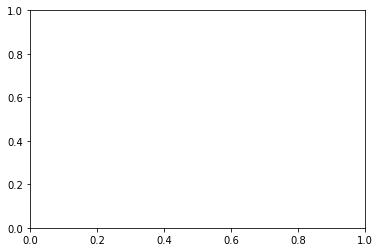

In [ ]:
import matplotlib.pyplot as plt
 
# memvisualisasikan model
plt.scatter(X, Y)
plt.plot(X, model.predict(X))